In [37]:

import numpy as np
import pandas as pd

# Importing  tools for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import evaluation metric libraries
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report

# Import Sampling
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

# Word Cloud library
from wordcloud import WordCloud, STOPWORDS

# Library used for data preprocessing
from sklearn.feature_extraction.text import CountVectorizer

# Import model selection libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, RepeatedStratifiedKFold

# Library used for ML Model implementation
from sklearn.naive_bayes import MultinomialNB

# Importing the Pipeline class from scikit-learn
from sklearn.pipeline import Pipeline

# Library used for ignore warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [38]:

df = pd.read_csv("spam.csv", encoding="latin-1")


In [39]:
df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [40]:
df.shape

(5572, 5)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [42]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [44]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [45]:
df.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [46]:
df['v1'].value_counts()

v1
ham     4825
spam     747
Name: count, dtype: int64

In [47]:
df['v2'].unique()

array(['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
       'Ok lar... Joking wif u oni...',
       "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
       ..., 'Pity, * was in mood for that. So...any other suggestions?',
       "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free",
       'Rofl. Its true to its name'], dtype=object)

In [48]:
df.duplicated().sum()

np.int64(403)

In [49]:
df.drop_duplicates()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [53]:
df['Spam']=df['v1'].replace('v1','Spam')

In [54]:
df.head()

,v1,v2,Spam
0,ham,"Go until jurong point, crazy.. Available only ...",ham
1,ham,Ok lar... Joking wif u oni...,ham
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,ham,U dun say so early hor... U c already then say...,ham
4,ham,"Nah I don't think he goes to usf, he lives aro...",ham


In [55]:
df['Spam']=df['Spam'].map({'spam':1,'ham':0})

In [56]:
df.head()

,v1,v2,Spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


Text(0.5, 1.0, 'Distribution of Spam vs Ham')

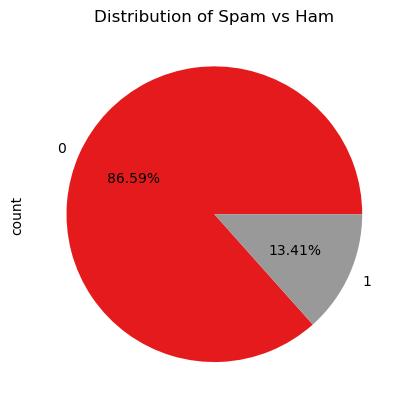

In [63]:
df['Spam'].value_counts().plot(kind='pie',autopct='%1.2f%%', cmap='Set1')
plt.title(f'Distribution of Spam vs Ham')

In [64]:
df.head()

,v1,v2,Spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [69]:
df['message']=df['v2'].replace('v2','message')

In [70]:
from nltk.corpus import stopwords
english_stopwords=stopwords.words('english')

In [71]:
english_stopwords[0:10]

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an']

In [77]:
import wordcloud
import missingno as msno
wordcloud.WordCloud()

<Axes: >

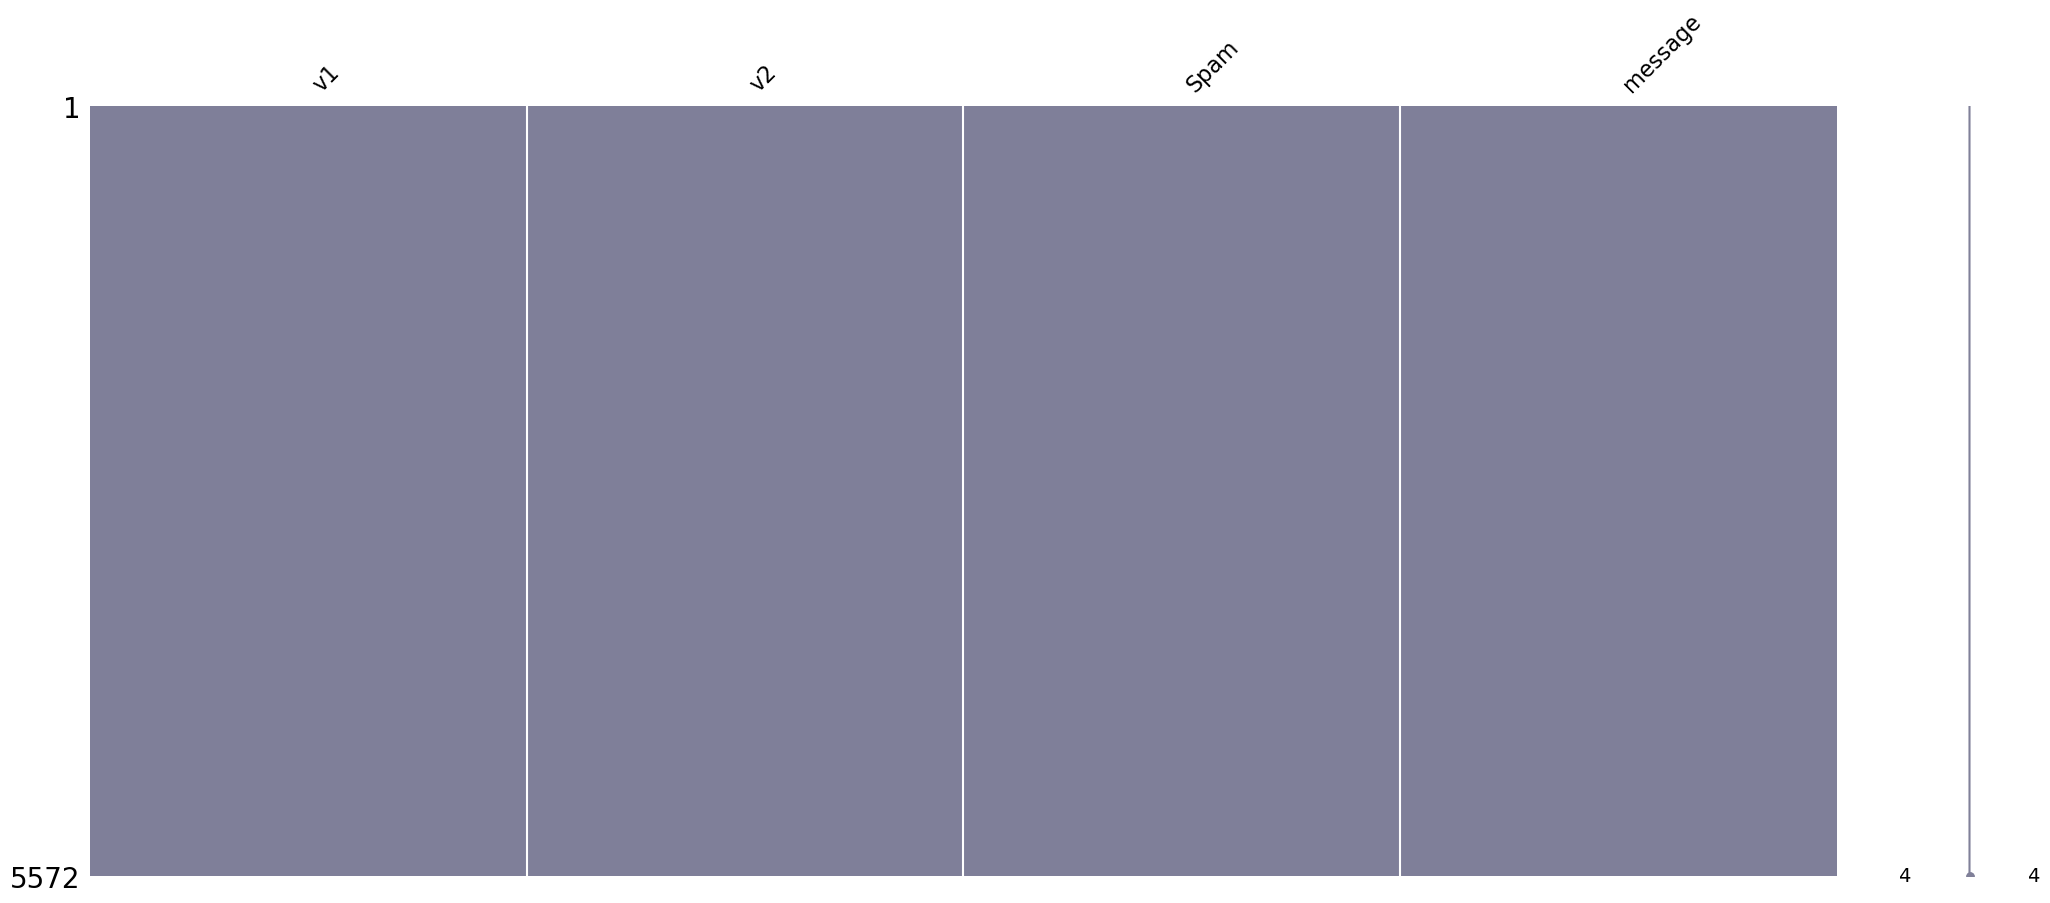

In [78]:
msno.matrix(df,color=(0.5,0.5,0.6))

In [87]:
from nltk.stem import WordNetLemmatizer
import string
lemmatizer = WordNetLemmatizer()
def text_preprocessor(text):
    text_preprocessed = []
    text = text.translate(str.maketrans('', '', string.punctuation))
    for word in text.split():
        word = word.lower()
        word = lemmatizer.lemmatize(word)
        if word not in english_stopwords:
            text_preprocessed.append(word)
    return ' '.join(text_preprocessed)


In [88]:
df['message']=df['message'].apply(text_preprocessor)

In [89]:
df.head()

,v1,v2,Spam,message
0,ham,"Go until jurong point, crazy.. Available only ...",0,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,0,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,0,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,nah dont think go usf life around though


In [90]:
df['message'][0]

'go jurong point crazy available bugis n great world la e buffet cine got amore wat'

In [102]:
df_spam=df[df.Spam==1]['message']

In [103]:
df_spam=''.join(df_spam.to_list())


In [104]:
df_ham=df[df['Spam']==0]['message']

In [105]:
df_ham=''.join(df_ham.to_list())

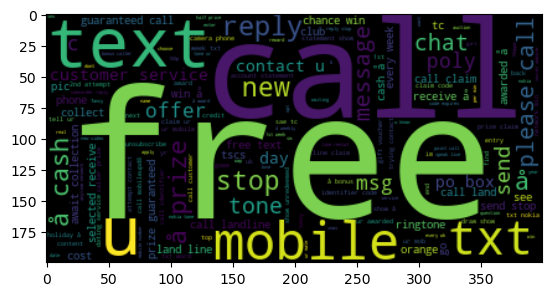

In [106]:

word_cloud = wordcloud.WordCloud().generate(df_spam)
plt.imshow(word_cloud, interpolation = 'bilinear')
plt.show()

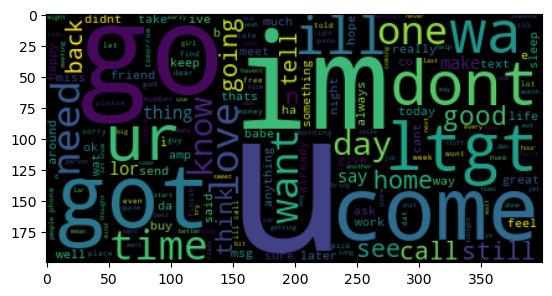

In [107]:
word_cloud = wordcloud.WordCloud().generate(df_ham)
plt.imshow(word_cloud, interpolation = 'bilinear')
plt.show()

In [109]:
df.drop(columns=['v1','v2'],inplace=True,axis=1)

In [110]:
df.head()


,Spam,message
0,0,go jurong point crazy available bugis n great ...
1,0,ok lar joking wif u oni
2,1,free entry 2 wkly comp win fa cup final tkts 2...
3,0,u dun say early hor u c already say
4,0,nah dont think go usf life around though


In [125]:
X=df.drop('Spam',axis=1)
y=df['Spam']

In [130]:
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['Spam'], test_size = 0.3)

In [139]:
import gensim
from gensim.models import Word2Vec

In [140]:
x_train_text=[text.split(' ') for text in X_train]
x_test_text=[text.split(' ') for text in X_test]

In [145]:
word2vec=Word2Vec(x_train_text,min_count=2)

In [146]:
avgword2vec_train = []
for sentence in x_train_text:
    vector = np.zeros(word2vec.vector_size)
    count = 0
    for word in sentence:
        if word in word2vec.wv:
            vector += word2vec.wv[word]
            count += 1
    if count != 0:
        vector = vector / count
    avgword2vec_train.append(vector)

In [148]:

avgword2vec_test = []
for sentence in x_test_text:
    vector = np.zeros(word2vec.vector_size)
    count = 0
    for word in sentence:
        if word in word2vec.wv:
            vector += word2vec.wv[word]
            count += 1
    if count != 0:
        vector = vector / count
    avgword2vec_test.append(vector)


avgword2vec_df_train = pd.DataFrame(avgword2vec_train)
avgword2vec_df_test = pd.DataFrame(avgword2vec_test)


In [149]:
avgword2vec_df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.071427,0.250929,0.075150,-0.070087,0.134073,-0.469587,0.120043,0.605017,-0.177779,-0.169659,...,0.411615,0.114742,0.007775,0.065666,0.436787,0.263420,0.120527,-0.332536,0.083641,-0.042357
1,-0.026955,0.087605,0.018636,-0.018631,0.042745,-0.159729,0.041442,0.206420,-0.060030,-0.048873,...,0.143825,0.043865,0.002410,0.020667,0.150695,0.091500,0.042594,-0.111774,0.028560,-0.013013
2,-0.050253,0.182265,0.056955,-0.050969,0.099123,-0.342304,0.089611,0.441829,-0.129171,-0.123211,...,0.298644,0.086929,0.007184,0.044265,0.317138,0.193080,0.091726,-0.244591,0.061785,-0.033113
3,-0.029224,0.094621,0.024548,-0.024937,0.051574,-0.175596,0.046013,0.231559,-0.064477,-0.058176,...,0.154491,0.044449,-0.000072,0.021376,0.163927,0.098236,0.048551,-0.124430,0.032464,-0.012862
4,-0.060509,0.204317,0.062358,-0.058667,0.113704,-0.387609,0.098242,0.499063,-0.145319,-0.142464,...,0.341203,0.092987,0.007221,0.051092,0.356956,0.217922,0.102163,-0.275352,0.068715,-0.035077


In [151]:
avgword2vec_df_test.tail()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
1667,-0.067264,0.213634,0.067744,-0.063052,0.117227,-0.397502,0.099763,0.519476,-0.147670,-0.146196,...,0.360401,0.096331,0.009458,0.055609,0.372934,0.229231,0.102965,-0.288234,0.066623,-0.036871
1668,-0.039362,0.132891,0.042985,-0.033258,0.074082,-0.251266,0.065344,0.324688,-0.096555,-0.090786,...,0.222972,0.058425,0.005036,0.036068,0.235582,0.140838,0.066800,-0.177048,0.043370,-0.022979
1669,-0.050818,0.157909,0.047385,-0.042124,0.085370,-0.293329,0.074737,0.382762,-0.110937,-0.105516,...,0.259665,0.076950,0.003555,0.043330,0.276678,0.170259,0.078217,-0.209163,0.057019,-0.025348
1670,-0.044291,0.150223,0.042859,-0.040772,0.079505,-0.282615,0.070681,0.364424,-0.104516,-0.100116,...,0.246834,0.073192,0.004523,0.038590,0.264161,0.155768,0.074951,-0.198876,0.047723,-0.024205
1671,-0.030336,0.122983,0.040315,-0.028772,0.074182,-0.222296,0.053580,0.294015,-0.087013,-0.084651,...,0.191253,0.054518,0.004558,0.028484,0.211795,0.117060,0.063487,-0.158665,0.039816,-0.021657


In [152]:
from tqdm import tqdm 
y_train.reset_index(drop = True, inplace = True)
y_test.reset_index(drop = True, inplace = True)

In [153]:
X_train_w2v = np.array(avgword2vec_train)
y_train_w2v = np.array(y_train)

In [154]:
X_test_w2v = np.array(avgword2vec_test)
y_test_w2v = np.array(y_test)

In [164]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_w2v, y_train_w2v)


In [167]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,roc_auc_score

model = RandomForestClassifier(random_state=42)
model.fit(X_train_res, y_train_res)
y_predictions = model.predict(X_test_w2v)
print("Accuracy:", accuracy_score(y_test_w2v, y_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test_w2v, y_predictions))
print("Classification Report:\n", classification_report(y_test_w2v, y_predictions))
print("Roc_Auc_Score:\n", roc_auc_score(y_test_w2v, y_predictions))

Accuracy: 0.9354066985645934
Confusion Matrix:
 [[1404   40]
 [  68  160]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      1444
           1       0.80      0.70      0.75       228

    accuracy                           0.94      1672
   macro avg       0.88      0.84      0.86      1672
weighted avg       0.93      0.94      0.93      1672

Roc_Auc_Score:
 0.8370267774699908


In [168]:
from xgboost import XGBClassifier
model=XGBClassifier()
model.fit(X_train_res, y_train_res)
y_predictions = model.predict(X_test_w2v)
print("Accuracy:", accuracy_score(y_test_w2v, y_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test_w2v, y_predictions))
print("Classification Report:\n", classification_report(y_test_w2v, y_predictions))
print("Roc_Auc_Score:\n", roc_auc_score(y_test_w2v, y_predictions))

Accuracy: 0.9132775119617225
Confusion Matrix:
 [[1352   92]
 [  53  175]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95      1444
           1       0.66      0.77      0.71       228

    accuracy                           0.91      1672
   macro avg       0.81      0.85      0.83      1672
weighted avg       0.92      0.91      0.92      1672

Roc_Auc_Score:
 0.851915974145891


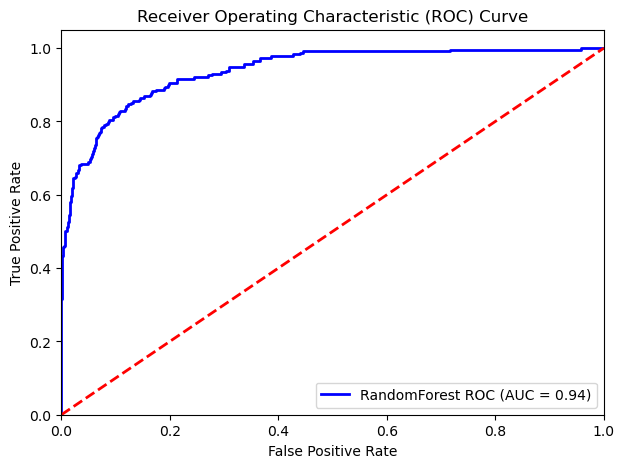

In [170]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Train RandomForest on oversampled training data
model = RandomForestClassifier(
    n_estimators=300,
    max_depth=15,
    min_samples_leaf=2,
    max_features='sqrt',
    class_weight='balanced',
    random_state=42
)
model.fit(X_train_res, y_train_res)

# Predict probabilities for test set
y_prob = model.predict_proba(X_test_w2v)[:,1]  # probability for class 1 (spam)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test_w2v, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, color='blue', lw=2, label='RandomForest ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')  # diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
